# Amazon Top 50 Bestselling Books 2009 &ndash; 2019
---
This notebook is a quick finger exercise to gain some basic insights from a simple dataset:  
https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019

---

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## What are we dealing with?
---
Let's have a look at the first few entries and get some basic information about the dataset.  
Apparently, our .csv file contains 550 entries with no missing values.  
We have seven attributes for each entry: book title, author, rating, the number of reviews, the year and the genre.

---

In [2]:
df = pd.read_csv('bestsellers with categories.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
Name           550 non-null object
Author         550 non-null object
User Rating    550 non-null float64
Reviews        550 non-null int64
Price          550 non-null int64
Year           550 non-null int64
Genre          550 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


<p style="page-break-after:always;"></p>

## Calculating weighted rating using the IMDB formula
---
To ensure that books with the same rating but different number of reviews are scored adequately, we can use the IMDB formula (https://en.wikipedia.org/wiki/IMDb). I will name the new variable in the dataset "Score".  
The formula is this:


$
\begin{align}
W = \frac{Rv + Cm}{v + m}
\end{align}
$

W = weighted rating  
R = the rating of the book  
C = the mean raitng of the book  
v = the number of reviews for the book  
m = the minimum number of reviews in the dataset

---

In [4]:
def weighted_rating(df, m, C):
    v = df['Reviews']
    R = df['User Rating']
    return (R*v+C*m)/(v+m)

C = df['User Rating'].mean()
m = df['Reviews'].min()


df['Score'] = weighted_rating(df,m=m,C=C)
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Score
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,4.699826
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,4.600325
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,4.699841
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,4.699859
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,4.799127


<p style="page-break-after:always;"></p>

## Top 10 books based on weighted rating
---
Now that we have a fair scoring attribute, let's check the top of the top.  
I am surprised to see that only one non fiction book made it to the top 10, with a religious topic.

---

In [5]:
df_top_10 = df[['Author', 'Name', 'Genre', 'Score']].groupby(['Author', 'Name', 'Genre']).max().reset_index()
df_top_10.sort_values(by='Score', ascending=False).head(10).reset_index(drop=True)

,Author,Name,Genre,Score
0,Dr. Seuss,"Oh, the Places You'll Go!",Fiction,4.899524
1,J.K. Rowling,Harry Potter and the Chamber of Secrets: The I...,Fiction,4.899470
2,Sarah Young,Jesus Calling: Enjoying Peace in His Presence ...,Non Fiction,4.899469
3,Eric Carle,The Very Hungry Caterpillar,Fiction,4.899468
4,Bill Martin Jr.,"Brown Bear, Brown Bear, What Do You See?",Fiction,4.899275
5,Dav Pilkey,Dog Man: Fetch-22: From the Creator of Captain...,Fiction,4.899177
6,Jill Twiss,Last Week Tonight with John Oliver Presents A ...,Fiction,4.899126
7,J.K. Rowling,Harry Potter and the Sorcerer's Stone: The Ill...,Fiction,4.898967
8,Jeff Kinney,Wrecking Ball (Diary of a Wimpy Kid Book 14),Fiction,4.898897
9,Nathan W. Pyle,Strange Planet (Strange Planet Series),Fiction,4.898894


## Basic statistics
---
By taking a quick look at basic stats figures we can gain some initial insights about the numerical attributes:
* the user ratings spread from 3.3 up to 4.9 with a median of 4.7 which is quite high
* the number of reviews show a huge standard deviation, the values spread from 37 up to around 88,000
* some of the books in the dataset have a price of £0.00

---

In [6]:
attributes = ['User Rating', 'Reviews', 'Price', 'Score']
df[attributes].describe()

,User Rating,Reviews,Price,Score
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,4.618757
std,0.226980,11731.132017,10.842262,0.225373
min,3.300000,37.000000,0.000000,3.305184
25%,4.500000,4058.000000,7.000000,4.501186
50%,4.700000,8580.000000,11.000000,4.699140
75%,4.800000,17253.250000,16.000000,4.798927
max,4.900000,87841.000000,105.000000,4.899524


<p style="page-break-after:always;"></p>

## What is the distribution of attribute values?
---
Let's create some histograms for the numerical attributes and evaluate them:
* the prices are a unimodal, right skewed set of values, with a peak around £10
* the number of reviews show a unimodal, heavily right skewed distribution with a peak around 2,000
* the user ratings and the scores are unimodal and left skewed with a peak around 4.8
---

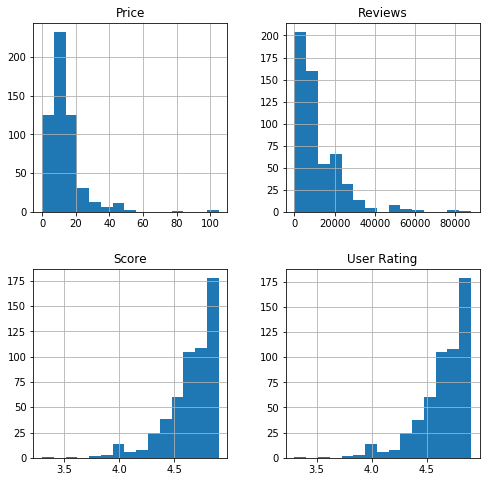

In [7]:
df[attributes].hist(bins=15, figsize=(8, 8))
plt.show()

## Are there any correlations between the attributes?
---
We can also check if there are any obvious correlations between the numerical attributes. Of course, the scores and the user ratings have a positive linear correlation, but that is to be ignored because the scores are based on the ratings. We can conclude that there are no obvious correlations between any of these attributes.

---

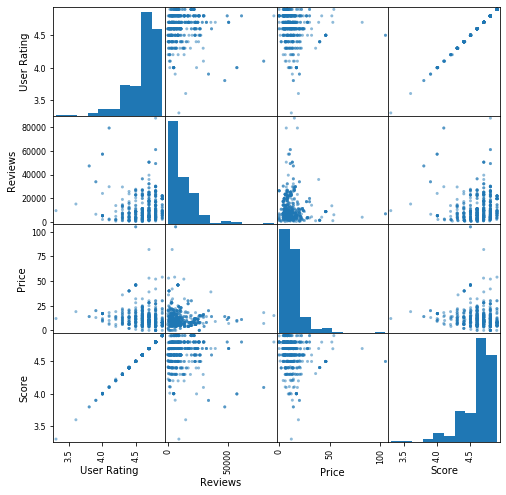

In [8]:
scatter_matrix(df[attributes], figsize=(8, 8), alpha=0.5)
plt.show()

<p style="page-break-after:always;"></p>

## Word cloud
---
Before turning to prices, let's have some fun and create a word cloud from the book titles. It looks like "Book", "Novel", "Love" or "Life" are fairly popular words in book titles.

---

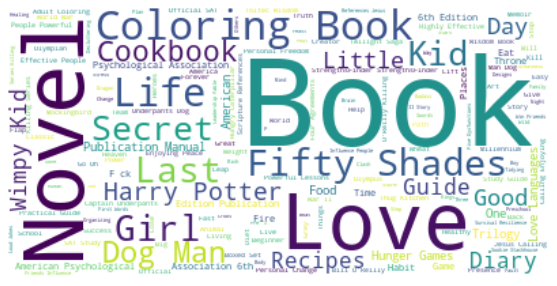

In [9]:
text = " ".join(review for review in df['Name'])
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure( figsize=(10,5) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Prices
---
If we take a closer look at the prices by genre, it becomes clear that non fiction books tend to be more expensive than fictions.  
Also, the average price for popular books seems to have a downward tendency over the years.

---

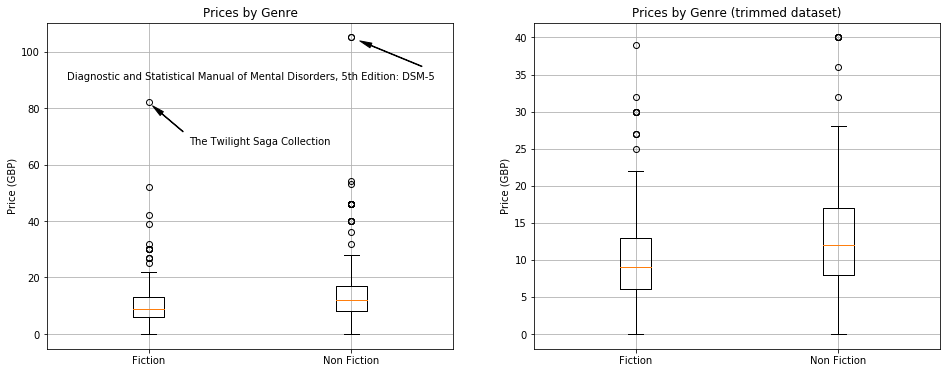

In [10]:
fiction = df[df['Genre']=='Fiction']
non_fiction = df[df['Genre']=='Non Fiction']
prices = [fiction['Price'], non_fiction['Price']]

fiction_trimmed = df[(df['Genre']=='Fiction') & (df['Price']<=40)]
non_fiction_trimmed = df[(df['Genre']=='Non Fiction') & (df['Price']<=40)]
prices_trimmed = [fiction_trimmed['Price'], non_fiction_trimmed['Price']]

fiction_max = fiction.sort_values(by='Price', ascending=False).reset_index()['Name'][0]
non_fiction_max = non_fiction.sort_values(by='Price', ascending=False).reset_index()['Name'][0]

fig, axes = plt.subplots(ncols=2, figsize=(16, 6))
axes[0].boxplot(prices)
axes[0].grid()
axes[0].set_title('Prices by Genre')
axes[0].set_xticklabels(['Fiction', 'Non Fiction'])
axes[0].set_ylabel('Price (GBP)')
axes[0].annotate(fiction_max, xy=(1, prices[0].max()), xytext=(1.2, prices[0].max()-15),
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))#
axes[0].annotate(non_fiction_max, xy=(2, prices[1].max()), xytext=(0.6, prices[1].max()-15),
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))

axes[1].boxplot(prices_trimmed)
axes[1].grid()
axes[1].set_title('Prices by Genre (trimmed dataset)')
axes[1].set_xticklabels(['Fiction', 'Non Fiction'])
axes[1].set_ylabel('Price (GBP)')


plt.show()

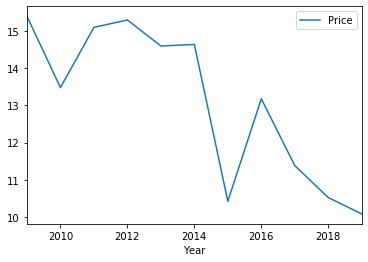

In [11]:
df_yearly_mean_prices = df[['Year', 'Price']].groupby('Year').mean()
df_yearly_mean_prices.plot()
plt.show()